<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/24%20-%20Sklearn%20%3A%20Apprentissage%20Non-supervis%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 24/30 Apprentissage Non-Supervisé

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#pd.set_option('max_columns', None)

## 1. K-Means Clustering

In [2]:
from sklearn.cluster import KMeans

In [3]:
# Génération de données
#X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
#plt.scatter(X[:,0], X[:,1])
data = pd.read_csv("input/TP2_appartement.txt", "\t")

D:\ESGI\5AL\ML\ML-TP\venv\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17895 entries, 0 to 17894
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17895 non-null  object 
 1   Temperature    17895 non-null  float64
 2   Humidity       17895 non-null  float64
 3   Light          17895 non-null  float64
 4   CO2            17895 non-null  float64
 5   HumidityRatio  17895 non-null  float64
dtypes: float64(5), object(1)
memory usage: 839.0+ KB


In [5]:
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio
0,04/02/2015 17:51,23.18,27.2720,426.0,721.25,0.004793
1,04/02/2015 17:51,23.15,27.2675,429.5,714.00,0.004783
2,04/02/2015 17:53,23.15,27.2450,426.0,713.50,0.004779
3,04/02/2015 17:54,23.15,27.2000,426.0,708.25,0.004772
4,04/02/2015 17:55,23.10,27.2000,426.0,704.50,0.004757


In [6]:
X = data.drop("date", axis=1)

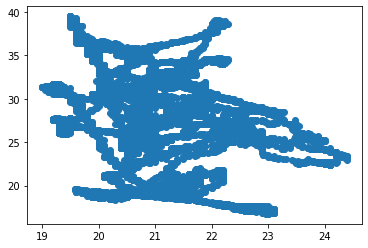

In [7]:
X = data["Temperature"]
y = data["Humidity"]
plt.scatter(X, y)

In [8]:
X = data.drop(['date'], axis=1)

# Modélisation

## Kmeans

In [9]:
# création du modèle
model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(X)

KMeans(n_clusters=3)

In [10]:
# Evaluation
print(model_kmeans.score(X))
model_kmeans.inertia_

-530290695.43799996


530290695.43799996

In [11]:
#Création des clusters/classes sur la base train
clusters_kmeans = model_kmeans.predict(X)

clusters_kmeans


array([1, 1, 1, ..., 2, 2, 2])

In [12]:
import pandas as pd

clusters_kmeans1 = pd.DataFrame({'clusters':clusters_kmeans})
clusters_kmeans1['clusters'].value_counts()



0    12682
1     3455
2     1758
Name: clusters, dtype: int64

In [13]:
clusters_kmeans1

,clusters
0,1
1,1
2,1
3,1
4,1
...,...
17890,2
17891,2
17892,2
17893,2


In [14]:
Xn = X.to_numpy()
Xn

array([[2.31800000e+01, 2.72720000e+01, 4.26000000e+02, 7.21250000e+02,
        4.79298818e-03],
       [2.31500000e+01, 2.72675000e+01, 4.29500000e+02, 7.14000000e+02,
        4.78344095e-03],
       [2.31500000e+01, 2.72450000e+01, 4.26000000e+02, 7.13500000e+02,
        4.77946352e-03],
       ...,
       [2.08900000e+01, 2.77450000e+01, 4.23500000e+02, 1.52150000e+03,
        4.23681810e-03],
       [2.08900000e+01, 2.80225000e+01, 4.18750000e+02, 1.63200000e+03,
        4.27948547e-03],
       [2.10000000e+01, 2.81000000e+01, 4.09000000e+02, 1.86400000e+03,
        4.32073200e-03]])

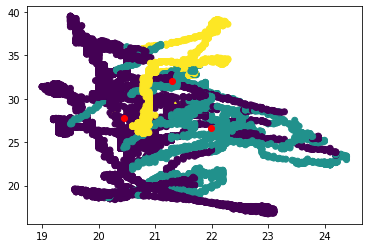

In [15]:
# Visualisation des clusters
plt.scatter(Xn[:,0], Xn[:,1], c = clusters_kmeans)
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], c='r')

In [16]:
# connaitre le nombre de variables explicatives
model_kmeans.n_features_in_

5

In [17]:
# connaitre le nombre de cluster
model_kmeans.n_clusters

3

In [18]:
# connaitre les centres
model_kmeans.cluster_centers_

array([[2.04466957e+01, 2.78150551e+01, 1.83285786e+01, 5.40108794e+02,
        4.12546202e-03],
       [2.19829011e+01, 2.66043440e+01, 4.72441891e+02, 8.29745897e+02,
        4.34347347e-03],
       [2.13051910e+01, 3.20642974e+01, 1.75583020e+02, 1.46082071e+03,
        5.04911552e-03]])

### Elbow Method

In [19]:
# Recherche du k optimal par la méthode du coude
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

Text(0, 0.5, 'Cout du modele (Inertia)')

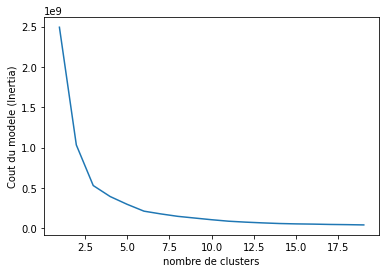

In [20]:
# Visualisation du coude
plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

## 2. Detection d'anomalies avec Isolation Forest

In [21]:
from sklearn.ensemble import IsolationForest

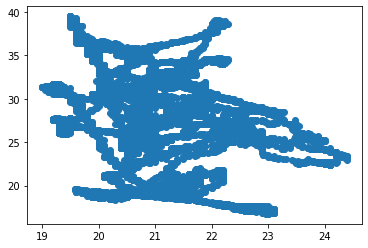

In [23]:
# Générer les données
#X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
#X[-1,:] = np.array([2.25, 5])

plt.scatter(Xn[:,0], Xn[:, 1])

In [24]:
# Création du modèle d'isolation Forest

model_isofo = IsolationForest(contamination=0.01)

anomalies = model_isofo.fit(X)

D:\ESGI\5AL\ML\ML-TP\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [25]:
# Clusters des anomalies
clusters_ano = anomalies.predict(X)

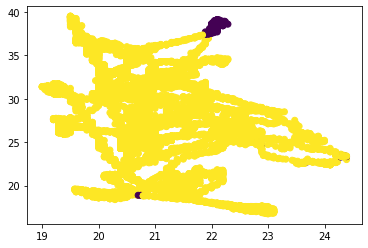

In [27]:
# Visualisation des clusters des anomalies
plt.scatter(Xn[:,0], Xn[:, 1], c=clusters_ano)

### Application : Digits Outliers

In [28]:
from sklearn.datasets import load_digits

# chargement des données

digits = load_digits()

In [29]:
# récupérer des les images
images = digits.images

# variables explicatives oufeatures
X = digits.data

# Variables à expliquer ou Target
y = digits.target



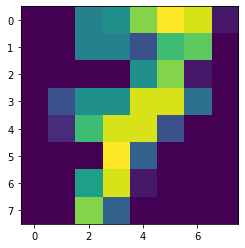

In [30]:
# Affichage d'une image
plt.imshow(images[7])

In [31]:
model_isofo2 = IsolationForest(random_state=0, contamination=0.02)

ano = model_isofo2.fit(X)

outliers = ano.predict(X) == -1

outliers

array([False, False, False, ..., False, False, False])

In [32]:
# compter les outliers
outliers1 = pd.DataFrame({'clusters':outliers})
outliers1['clusters'].value_counts()

False    1761
True       36
Name: clusters, dtype: int64

In [33]:

outliers_true = list(filter(lambda out: out == True, outliers))
outliers_true = np.array(outliers_true)
outliers_true

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

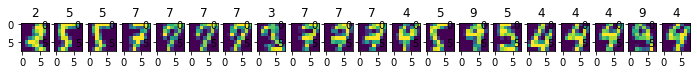

In [34]:
plt.figure(figsize=(12, 3))
for i in range(20):
  plt.subplot(1, 20, i+1)
  plt.imshow(images[outliers][i])
  plt.title(y[outliers][i])

## 2. PCA : Reduction de dimension

### Visualisation 2D

In [35]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X)

PCA(n_components=2)

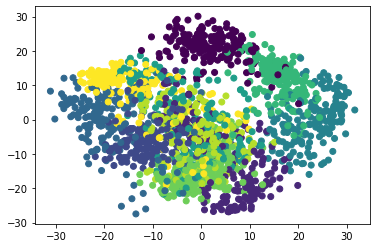

In [36]:
x_pca = model.transform(X)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)

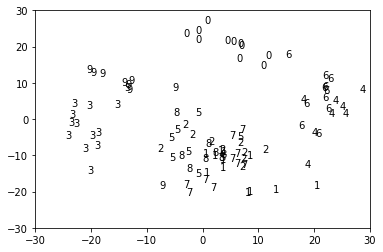

In [37]:
plt.figure()
plt.xlim(-30, 30)
plt.ylim(-30, 30)

for i in range(100):
    plt.text(x_pca[i,0], x_pca[i,1], str(y[i]))

### Compression de données

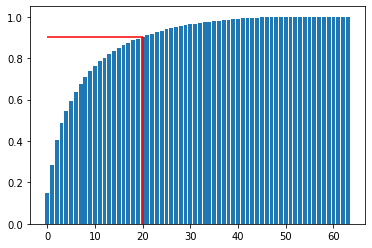

In [38]:
n_dims = X.shape[1]
model = PCA(n_components=n_dims)
model.fit(X)

variances = model.explained_variance_ratio_

meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)


plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r')


In [39]:
model = PCA(n_components=0.99)
model.fit(X)

PCA(n_components=0.99)

Text(0.5, 1.0, 'Compressé')

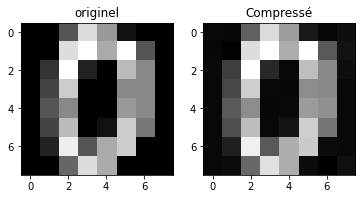

In [40]:
X_compress = model.fit_transform(X)
X_decompress = model.inverse_transform(X_compress)

plt.subplot(1, 2, 1)
plt.imshow(X[0,:].reshape((8,8)), cmap='gray')
plt.title('originel')
plt.subplot(1, 2, 2)
plt.imshow(X_decompress[0,:].reshape((8,8)), cmap='gray')
plt.title('Compressé')